In [65]:
import pandas as pd
import random
print(random.uniform(0, 1))
df = pd.read_csv('Airbnb_data/listings_SanFan.csv')
print(len(df))
len(df['last_scraped'].unique())
df.head()
df['property_type'].unique()

0.8096612419917176
5207


array(['House', 'Condominium', 'Townhouse', 'Apartment', 'Other', 'Loft',
       'Guest suite', 'Guesthouse', 'In-law', 'Boutique hotel', 'Boat',
       'Hostel', 'Bed & Breakfast', 'Dorm', 'Timeshare',
       'Serviced apartment', 'Vacation home', 'Bungalow', 'Villa'],
      dtype=object)

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline
df = pd.read_csv('Airbnb_data/listings_SanFan.csv')

# u'zipcode',u'location_price',,u'instant_bookable', u'host_is_superhost',u'host_response_rate',
selected_features = [u'price',u'accommodates',u'host_response_time',
       u'bathrooms', u'bedrooms', u'beds',u'security_deposit', u'cleaning_fee', u'guests_included',
       u'extra_people', u'minimum_nights', u'maximum_nights',u'guests_included',  
       u'availability_365',
       u'number_of_reviews', u'review_scores_rating',u'review_scores_cleanliness', u'review_scores_checkin',
       u'review_scores_communication', u'review_scores_location',
       u'review_scores_value', u'house_rules',u'amenities','bed_type', 'room_type', 'cancellation_policy', 'property_type']
df = df.loc[:, selected_features]
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df.head()

,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_rules,amenities,bed_type,room_type,cancellation_policy,property_type
0,$56.00,4,within an hour,1.0,1.0,2.0,$100.00,$30.00,2,$15.00,...,10.0,10.0,10.0,10.0,- Private bathroom is on the first floor (slig...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House
1,$36.00,2,within an hour,1.0,1.0,1.0,$100.00,$35.00,1,$20.00,...,10.0,10.0,10.0,10.0,1. NO SMOKING! This rule applies for inside ou...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium
2,$80.00,6,within an hour,1.5,2.0,3.0,$150.00,$65.00,4,$15.00,...,10.0,10.0,10.0,10.0,"I don't ask much, just to please respect the s...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse
3,$80.00,2,within a few hours,1.0,1.0,1.0,$100.00,$10.00,2,$10.00,...,10.0,10.0,10.0,10.0,Guests should treat my condo as their home wit...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium
4,$20.00,3,within an hour,1.0,1.0,1.0,$100.00,$50.00,1,$10.00,...,10.0,10.0,10.0,9.0,If using the kitchen please clean up after you...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment


In [30]:
# df['review_scores_rating'].describe()
# df['zipcode'].unique()
# def clean_zipcode(row):
#     return row[:7]
# df['zipcode'] = df.apply(clean_zipcode)
# df['zipcode'].unique()

# pd.to_numeric(df['zipcode'], errors = 'coerce')
# df['zipcode'][df['zipcode'] == '60660-1448']
# df['zipcode'] = df['zipcode'].apply(lambda x: str(x)[:6])
# df['zipcode'].unique()
# df['zipcode'].astype(float)
# sns.distplot(df['zipcode'])

In [31]:
# FEES and PRICES
df['price'] = df['price'].str.replace("\$|,", "").astype(float)
df['security_deposit'] = df['security_deposit'].str.replace("\$|,", "").astype(float)
df['cleaning_fee'] = df['cleaning_fee'].str.replace("\$|,", "").astype(float)
df['extra_people'] = df['extra_people'].str.replace("\$|,", "").astype(float)
df['availability'] = df['availability_365'] / 365

In [32]:
# remove rows that have 'NaN'in key features
# solve NaN cells in unimportant attributes

# remove_criteria = df['price'].isnull() | df['zipcode'].isnull()
# df = df[-remove_criteria]

In [33]:
# # APARTMENT TYPES
# enc = LabelEncoder()
# room_type = enc.fit( df['room_type'].values )
# df['room_type'] = room_type.transform(df['room_type'].values)

In [34]:
# HOUSE RULES
house_rules = df['house_rules'].str.lower()

smoking = house_rules.str.contains("smoke|smoking", na= False)
df.loc[:, 'smoking'] = - smoking # False: No smoking allowed

pet = house_rules.str.contains("pet", na=False)
df.loc[:, 'pet'] = - pet

party = house_rules.str.contains("party|parties", na=False)
df.loc[:, 'party'] = - party

guest = house_rules.str.contains("guest|guests", na=False)
df.loc[:, 'guest'] = - guest

df = df.drop(['house_rules'], axis = 1)


In [35]:
import re
# AMENITIES
amenities = list(df['amenities'])
total = ','.join(amenities)
total = total.replace("{", "").replace("}","").replace("\"", "").split(",")
amenity_items = list(set(total))
amenity_items = list(filter(None, amenity_items))
for item in amenity_items:
    if re.match(r'translation',item):
        amenity_items.remove(item)

In [36]:
# Turn Amenities into OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

amenities = list(df['amenities'])
new_table = pd.DataFrame(index = df.reset_index().values[:,0], columns = amenity_items).fillna(0)

for i in range(len(amenities)):
    for item in amenity_items:
        if item in amenities[i]:
            new_table.set_value(i, item, 1)

sum_table = np.array(new_table.sum())
ind = (-sum_table).argsort()[:60]
common_amenities = list(new_table.sum().iloc[ind].index)
df = df.drop(['amenities'], axis = 1)
df = pd.concat([df, new_table[common_amenities]], axis = 1)

<ipython-input-36-8f075bc6d8b7>:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  new_table.set_value(i, item, 1)


In [37]:
columns = ['bed_type', 'room_type', 'cancellation_policy', 'property_type', 'host_response_time']
for column in columns:  
    unique_values = list(df[column].unique())
    column_list = list(df[column])
    new_table = pd.DataFrame(index = df.reset_index().values[:,0], columns = unique_values).fillna(0)
    
    for i in range(len( column_list )):
        for item in unique_values:
            if item in column_list[i]:
                new_table.set_value(i, item, 1)  
    df = pd.concat( [df, new_table], axis = 1)
    df = df.drop([column], axis = 1)         
# df.columns.values

<ipython-input-37-c6eb794a1dac>:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  new_table.set_value(i, item, 1)


In [38]:
# df.dtypes
df.head()

,price,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,...,Dorm,Timeshare,Serviced apartment,Vacation home,Bungalow,Villa,within an hour,within a few hours,within a day,a few days or more
0,56.0,4,1.0,1.0,2.0,100.0,30.0,2,15.0,2,...,0,0,0,0,0,0,1,0,0,0
1,36.0,2,1.0,1.0,1.0,100.0,35.0,1,20.0,1,...,0,0,0,0,0,0,1,0,0,0
2,80.0,6,1.5,2.0,3.0,150.0,65.0,4,15.0,1,...,0,0,0,0,0,0,1,0,0,0
3,80.0,2,1.0,1.0,1.0,100.0,10.0,2,10.0,2,...,0,0,0,0,0,0,0,1,0,0
4,20.0,3,1.0,1.0,1.0,100.0,50.0,1,10.0,3,...,0,0,0,0,0,0,1,0,0,0


[0.06955685 0.06390113 0.03772548 0.0358486  0.02982786 0.02430278
 0.02028963 0.0195186  0.01782739 0.01724179 0.01602502 0.01572053
 0.01438767 0.0138632  0.01360289 0.01262276 0.01251103 0.0120902
 0.01166876 0.01151076 0.01052026 0.01049132 0.0100335  0.00989219
 0.00969512 0.00959927 0.00938656 0.00920723 0.00916206 0.00909726
 0.00889461 0.0087506  0.00869775 0.00862189 0.00856545 0.00853281
 0.00842537 0.00836566 0.00833029 0.00830031 0.00824866 0.00821214
 0.00813731 0.00807557 0.00804448 0.00793695 0.00784126 0.00777437
 0.00764853 0.00754121]


array([[ 0.26154393,  0.14567897, -0.63811911, ..., -0.62190358,
        -0.78503793, -0.2448944 ],
       [-0.22707047,  0.27141951,  0.89486734, ...,  0.41188463,
        -0.40577684,  0.59931175],
       [ 2.80367421, -2.91116788, -1.96937765, ...,  3.78159131,
        -0.27155959, -1.68233855],
       ...,
       [-0.48486211,  0.64265315, -0.01424531, ..., -0.1109291 ,
         0.54489408,  0.72041654],
       [-1.39993994,  1.16803699, -2.5771557 , ...,  0.92359736,
         2.45558658,  0.18040145],
       [-0.66725586, -0.0296383 ,  1.72951037, ...,  0.46290301,
        -0.17413502, -1.17447346]])

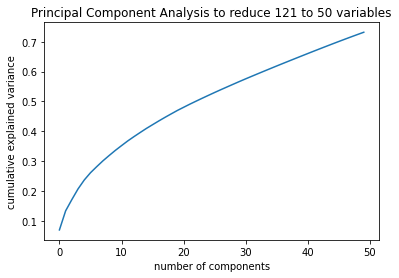

In [40]:
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
# df.drop(['longitude','latitude'], axis=1, inplace=True)
X = np.array(df.drop(['price'], axis = 1))
X_scaled = preprocessing.scale(X)
y =df['price']
pca = PCA(n_components=50)
X_scaled = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Principal Component Analysis to reduce 121 to 50 variables')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
X_scaled

[0 0 2 ... 0 0 0]


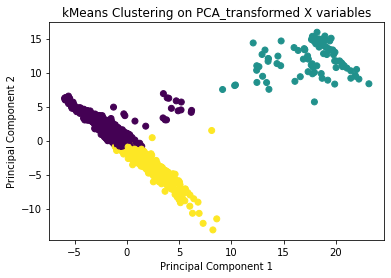

In [41]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=170).fit_predict(X_scaled)
print(y_pred)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred)
plt.title("kMeans Clustering on PCA_transformed X variables")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [42]:
# group1 = y_pred.index(y_pred == 0)
y_pred
ind1= np.where(y_pred == 1)
ind1
# group1 = X_scaled[ind1,:]
# group1.shape

(array([   9,  396,  399,  462,  464,  465,  466,  467,  468,  480,  481,
         503,  513,  543,  546,  710,  812, 1071, 1072, 1139, 1157, 1202,
        1203, 1340, 1371, 1453, 1460, 1496, 1528, 1576, 2025, 2079, 2216,
        2260, 2421, 2764, 2845, 2850, 2884, 2892, 2920, 2929, 2954, 2960,
        2992, 3028, 3067, 3239, 3279, 3281, 3287, 3318, 3330, 3378, 3524,
        3595, 3597, 3598, 3655, 3833, 3897, 3913, 4001, 4137, 4167, 4350,
        4487, 4496, 4521, 4522, 4525, 4611, 4624, 4625, 4632, 4635, 4641,
        4642, 4654, 4740, 4874, 4959, 4977, 4987, 5025, 5047, 5131, 5199],
       dtype=int64),)

In [43]:
df

,price,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,...,Dorm,Timeshare,Serviced apartment,Vacation home,Bungalow,Villa,within an hour,within a few hours,within a day,a few days or more
0,56.0,4,1.0,1.0,2.0,100.0,30.0,2,15.0,2,...,0,0,0,0,0,0,1,0,0,0
1,36.0,2,1.0,1.0,1.0,100.0,35.0,1,20.0,1,...,0,0,0,0,0,0,1,0,0,0
2,80.0,6,1.5,2.0,3.0,150.0,65.0,4,15.0,1,...,0,0,0,0,0,0,1,0,0,0
3,80.0,2,1.0,1.0,1.0,100.0,10.0,2,10.0,2,...,0,0,0,0,0,0,0,1,0,0
4,20.0,3,1.0,1.0,1.0,100.0,50.0,1,10.0,3,...,0,0,0,0,0,0,1,0,0,0
5,28.0,2,1.0,1.0,1.0,100.0,35.0,1,20.0,1,...,0,0,0,0,0,0,1,0,0,0
6,45.0,2,1.0,1.0,1.0,100.0,6.0,1,0.0,1,...,0,0,0,0,0,0,1,0,0,0
7,48.0,1,1.0,1.0,1.0,100.0,25.0,1,0.0,1,...,0,0,0,0,0,0,1,0,0,0
8,149.0,4,1.0,2.0,2.0,100.0,75.0,4,15.0,2,...,0,0,0,0,0,0,1,0,0,0
9,331.0,4,1.0,2.0,2.0,100.0,20.0,1,0.0,1,...,0,0,0,0,0,0,1,0,0,0


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

cluster_data=df.ix[:,2:]
X=cluster_data
y=df.ix[:,'price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tunedParameters=[{'n_estimators':range(50,100,10)}]
clf=GridSearchCV(RandomForestRegressor(n_jobs = -1, criterion='mse'), param_grid = tunedParameters,cv=10)

clf.fit(X, y)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

<ipython-input-44-66b700cc9ccd>:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  cluster_data=df.ix[:,2:]
<ipython-input-44-66b700cc9ccd>:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  y=df.ix[:,'price']


0.370 (+/-0.204) for {'n_estimators': 50}
0.353 (+/-0.214) for {'n_estimators': 60}
0.348 (+/-0.242) for {'n_estimators': 70}
0.375 (+/-0.213) for {'n_estimators': 80}
0.351 (+/-0.206) for {'n_estimators': 90}


<ipython-input-45-54ce5b5a2c9c>:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  y=df.ix[:,'price']
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\shubh\anaconda3\lib\site-packages\skl

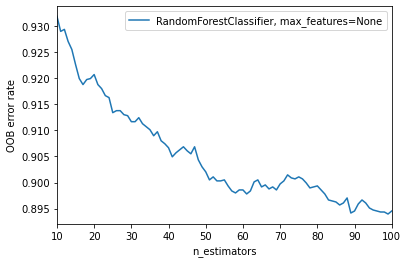

<ipython-input-45-54ce5b5a2c9c>:40: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  y=df.ix[:,'price']


RandomForestRegressor(n_jobs=1)

In [45]:
X=cluster_data
y=df.ix[:,'price']
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
ensemble_clfs = [("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=0))]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

from sklearn.ensemble import RandomForestRegressor

X=cluster_data
y=df.ix[:,'price']
tunedParameters = [{'n_estimators':100}]

clf2 = RandomForestRegressor(n_jobs = 1, criterion='mse', n_estimators=100)
#Fit Model
clf2.fit(X, y)

In [46]:
FeatImp = pd.DataFrame({'feature': list(X.columns), 'importance': list(clf2.feature_importances_)})
FeatImp = FeatImp.sort_values('importance', ascending = False)
#Set Index To Field You want to Sort Bar Chart By
FeatImp = FeatImp.set_index('feature')
FeatImp.head(100)
FeatImp.to_csv('feature_imp.csv')

In [47]:
FeatImp.index[0:30]

Index(['bedrooms', 'bathrooms', 'security_deposit', 'cleaning_fee',
       'minimum_nights', 'Boat', 'extra_people', 'beds', 'availability_365',
       'availability', 'Entire home/apt', 'number_of_reviews',
       'maximum_nights', 'Hangers', 'within a day', 'Hair dryer',
       'Suitable for events', 'Laptop friendly workspace',
       'Elevator in building', '24-hour check-in', 'within an hour',
       'Essentials', 'Breakfast', 'guests_included', 'flexible',
       'guests_included', 'review_scores_rating', 'Cable TV',
       'Indoor fireplace', 'First aid kit'],
      dtype='object', name='feature')

In [48]:
FeatImp['importance'].values[0:30]

array([0.12527666, 0.09355275, 0.08471791, 0.07656836, 0.07193944,
       0.07120464, 0.06317175, 0.04587778, 0.04292144, 0.03545114,
       0.02852834, 0.0200611 , 0.01306429, 0.01199965, 0.01157662,
       0.00915751, 0.00878054, 0.00800565, 0.0074687 , 0.0072036 ,
       0.00710715, 0.00692474, 0.00673872, 0.00600583, 0.00583638,
       0.00579811, 0.00540225, 0.00456283, 0.00431681, 0.00406246])

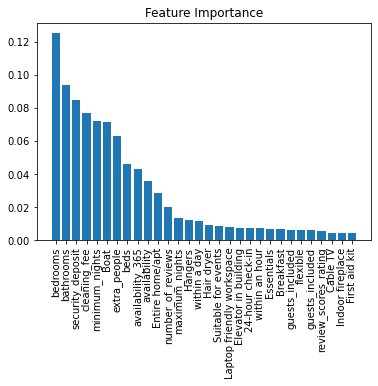

In [49]:
import matplotlib.pyplot as plt
plt.figure()

plt.title("Feature Importance")
y_pos = np.arange(len(FeatImp.index[0:30]))
plt.bar(y_pos,FeatImp['importance'].values[0:30])
plt.xticks(y_pos, FeatImp.index[0:30],rotation='vertical')
plt.show()

54.4

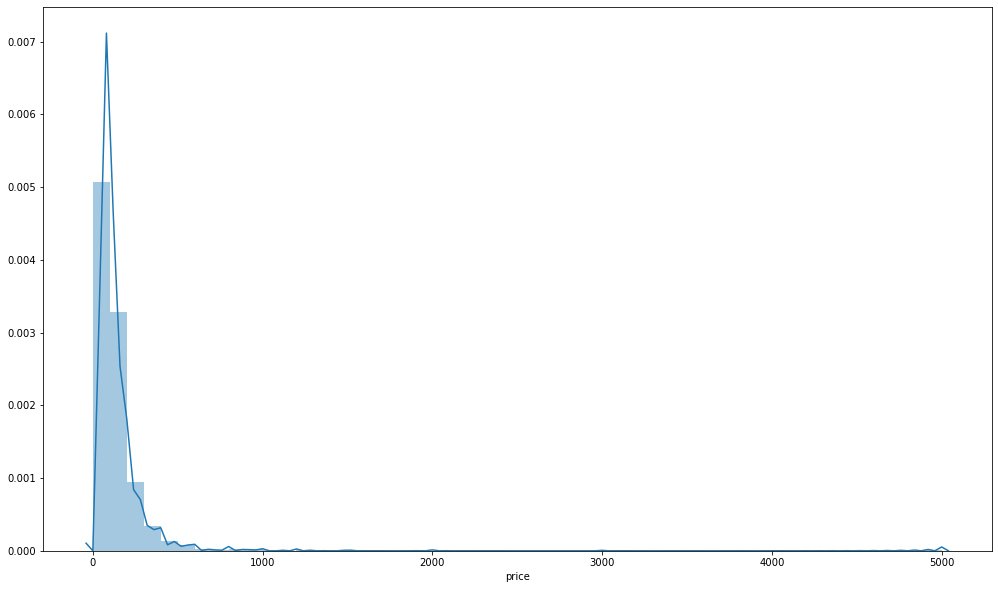

In [50]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(17,10))
sns.distplot(df['price'])
mean_price = df.price.iloc[:5].mean()
mean_price

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\series.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


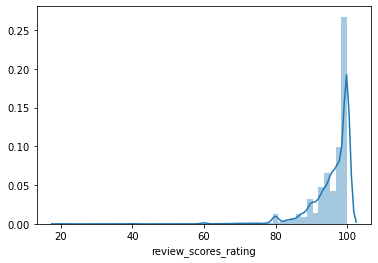

In [51]:
df['review_scores_rating'].fillna(0, inplace=True)
df['review_scores_rating'].dropna(axis=0, inplace=True)
sns.distplot(df['review_scores_rating'])


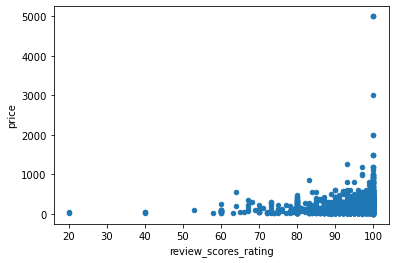

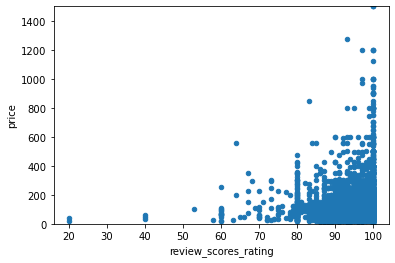

In [52]:
#Correlation Plot
var = 'review_scores_rating'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price')
data.plot.scatter(x=var, y='price', ylim=(0,1500))

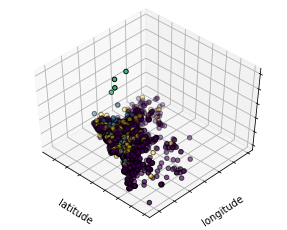

In [53]:
#cluster by locations
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

def plot_3D_clusters(X, k):
    """Plot 3 attributes in dataset to explore natural clusters within data"""
    estimators = {'k_means_3': KMeans(n_clusters=k)}
    fignum = 1
    for name, est in estimators.items():
        fig = plt.figure(fignum, figsize=(4, 3))
        plt.clf()
        ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
        plt.cla()
        est.fit(X)
        labels = est.labels_
        # Change the 2nd column in X[:,_] to choose attributes for plotting
        ax.scatter(X[:,0], X[:,1], X[:,2], c=labels.astype(np.float),edgecolor='k')
        ax.w_xaxis.set_ticklabels([])
        ax.w_yaxis.set_ticklabels([])
        ax.w_zaxis.set_ticklabels([])
        ax.set_xlabel('latitude')
        ax.set_ylabel('longitude')
        ax.set_zlabel('price')
        fignum = fignum + 1
    plt.show()
# change the n
df = pd.read_csv('Airbnb_data/listings_SanFan.csv')
df['price'] = df['price'].str.replace("\$|,", "").astype(float)
X = np.array(df[['latitude', 'longitude', 'price']])
plot_3D_clusters(X, 4)

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Create KNN model: 5 closest neighbors
knn = KNeighborsRegressor(algorithm='brute', n_neighbors = 5)
cols = ['bedrooms', 'bathrooms', 'beds']
knn.fit(X_train[cols], y_train)
features_predictions = knn.predict(X_train[cols])
features_mse = mean_squared_error(y_train, features_predictions)
features_rmse = features_mse ** (1/2)
features_rmse

165.49055044235695